### Choosing the Right Metric
This module introduced both the K Nearest Neighbors model as well as a variety of different metrics for classification.  It is important to select and understand the appropriate metric for your task.  This exercise is meant to get practice considering the difference between these new classification metrics and accompanying evaluation tools. Specifically, explore datasets related to business from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/).  

Select a dataset of interest and clearly state the classification task.  Specifically, describe a business problem that could be solved using the dataset and a KNN classification model.  Further, identify what you believe to be the appropriate metric and justify your choice.  Build a basic model with the `KNearestNeighbor` and grid search to optimize towards your chosen metric.  Share your results with your peers.

### Business Problem
The classification task consists in distinguishing Alzheimer’s disease patients from healthy people.

### Data Collection
- The **DARWIN dataset** includes handwriting data from 174 participants.
- repository_url: https://archive.ics.uci.edu/dataset/732/darwin
- data_url:  https://archive.ics.uci.edu/static/public/732/data.csv

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset from UCI Data Repo
darwin = fetch_ucirepo(id=732) 
  
# data (as pandas dataframes) 
X = darwin.data.features 
y = darwin.data.targets 

In [5]:
# access metadata
print('uci_id:', darwin.metadata.uci_id)
print('num_instances:', darwin.metadata.num_instances)
print('repository_url:' , darwin.metadata.repository_url)
print('data_url: ', darwin.metadata.data_url)
print('\nSummary:\n', darwin.metadata.additional_info.summary)

uci_id: 732
num_instances: 174
repository_url: https://archive.ics.uci.edu/dataset/732/darwin
data_url:  https://archive.ics.uci.edu/static/public/732/data.csv

Summary:
 None


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 451 entries, ID to total_time25
dtypes: float64(300), int64(150), object(1)
memory usage: 613.2+ KB


In [7]:
X

ID  air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
0      id_1       5160     0.000013    120.804174       86.853334   
1      id_2      51980     0.000016    115.318238       83.448681   
2      id_3       2600     0.000010    229.933997      172.761858   
3      id_4       2130     0.000010    369.403342      183.193104   
4      id_5       2310     0.000007    257.997131      111.275889   
..      ...        ...          ...           ...             ...   
169  id_170       2930     0.000010    241.736477      176.115957   
170  id_171       2140     0.000009    274.728964      234.495802   
171  id_172       3830     0.000008    151.536989      171.104693   
172  id_173       1760     0.000008    289.518195      196.411138   
173  id_174       2875     0.000008    235.769350      178.208024   

     max_x_extension1  max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  \
0                 957              6601          0.361800            0.217459   
1                1694              6998          0.272513            0.144880   
2                2333              5802          0.387020            0.181342   
3                1756              8159          0.556879            0.164502   
4                 987              4732          0.266077            0.145104   
..                ...               ...               ...                 ...   
169              1839              6439          0.253347            0.174663   
170              2053              8487          0.225537            0.174920   
171              1287              7352          0.165480            0.161058   
172              1674              6946          0.518937            0.202613   
173              1838              6560          0.567311            0.147818   

     mean_gmrt1  ...  mean_gmrt25  mean_jerk_in_air25  mean_jerk_on_paper25  \
0    103.828754  ...   249.729085            0.141434              0.024471   
1     99.383459  ...    77.258394            0.049663              0.018368   
2    201.347928  ...   193.667018            0.178194              0.017174   
3    276.298223  ...   163.065803            0.113905              0.019860   
4    184.636510  ...   147.094679            0.121782              0.020872   
..          ...  ...          ...                 ...                   ...   
169  208.926217  ...   200.568126            0.119152              0.020909   
170  254.612383  ...   231.243565            0.174495              0.017640   
171  161.320841  ...   177.935566            0.114472              0.017194   
172  242.964666  ...   177.935566            0.114472              0.017194   
173  206.988687  ...   177.935566            0.114472              0.017194   

     mean_speed_in_air25  mean_speed_on_paper25  num_of_pendown25  \
0               5.596487               3.184589                71   
1               1.665973               0.950249               129   
2               4.000781               2.392521                74   
3               4.206746               1.613522               123   
4               3.319036               1.680629                92   
..                   ...                    ...               ...   
169             4.508709               2.233198                96   
170             4.685573               2.806888                84   
171             3.493815               2.510601                88   
172             3.493815               2.510601                88   
173             3.493815               2.510601                88   

     paper_time25  pressure_mean25  pressure_var25  total_time25  
0           40120      1749.278166     296102.7676        144605  
1          126700      1504.768272     278744.2850        298640  
2           45480      1431.443492     144411.7055         79025  
3           67945      1465.843329     230184.7154        181220  
4           37285      1841.702561     158290.0255         72575  
..            ...          

In [8]:
X = X.drop(columns=['ID'])
X

air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  max_x_extension1  \
0         5160     0.000013    120.804174       86.853334               957   
1        51980     0.000016    115.318238       83.448681              1694   
2         2600     0.000010    229.933997      172.761858              2333   
3         2130     0.000010    369.403342      183.193104              1756   
4         2310     0.000007    257.997131      111.275889               987   
..         ...          ...           ...             ...               ...   
169       2930     0.000010    241.736477      176.115957              1839   
170       2140     0.000009    274.728964      234.495802              2053   
171       3830     0.000008    151.536989      171.104693              1287   
172       1760     0.000008    289.518195      196.411138              1674   
173       2875     0.000008    235.769350      178.208024              1838   

     max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  mean_gmrt1  \
0                6601          0.361800            0.217459  103.828754   
1                6998          0.272513            0.144880   99.383459   
2                5802          0.387020            0.181342  201.347928   
3                8159          0.556879            0.164502  276.298223   
4                4732          0.266077            0.145104  184.636510   
..                ...               ...                 ...         ...   
169              6439          0.253347            0.174663  208.926217   
170              8487          0.225537            0.174920  254.612383   
171              7352          0.165480            0.161058  161.320841   
172              6946          0.518937            0.202613  242.964666   
173              6560          0.567311            0.147818  206.988687   

     mean_jerk_in_air1  ...  mean_gmrt25  mean_jerk_in_air25  \
0             0.051836  ...   249.729085            0.141434   
1             0.039827  ...    77.258394            0.049663   
2             0.064220  ...   193.667018            0.178194   
3             0.090408  ...   163.065803            0.113905   
4             0.037528  ...   147.094679            0.121782   
..                 ...  ...          ...                 ...   
169           0.032691  ...   200.568126            0.119152   
170           0.032059  ...   231.243565            0.174495   
171           0.022705  ...   177.935566            0.114472   
172           0.090686  ...   177.935566            0.114472   
173           0.099555  ...   177.935566            0.114472   

     mean_jerk_on_paper25  mean_speed_in_air25  mean_speed_on_paper25  \
0                0.024471             5.596487               3.184589   
1                0.018368             1.665973               0.950249   
2                0.017174             4.000781               2.392521   
3                0.019860             4.206746               1.613522   
4                0.020872             3.319036               1.680629   
..                    ...                  ...                    ...   
169              0.020909             4.508709               2.233198   
170              0.017640             4.685573               2.806888   
171              0.017194             3.493815               2.510601   
172              0.017194             3.493815               2.510601   
173              0.017194             3.493815               2.510601   

     num_of_pendown25  paper_time25  pressure_mean25  pressure_var25  \
0                  71         40120      1749.278166     296102.7676   
1                 129        126700      1504.768272     278744.2850   
2                  74         45480      1431.443492     144411.7055   
3                 123         67945      1465.843329     230184.7154   
4                  92         37285      1841.702561     158290.0255   
..                ...           ...              ...             ...   
169  

In [9]:
# Missing Data: none found
for col in X.columns:
    if X[col].isnull().any():
        print(col)

In [10]:
y

class
0       P
1       P
2       P
3       P
4       P
..    ...
169     H
170     H
171     H
172     H
173     H

[174 rows x 1 columns]

In [11]:
# Explore target variable classes and counts
y['class'].value_counts()

class
P    89
H    85
Name: count, dtype: int64

In [12]:
# map target variable to binary values 0,1
y_map = {
    'P' : 1,
    'H' : 0
}

In [13]:
y.loc[:,'class'] = y['class'].map(y_map)

In [14]:
y = y.astype(int)

In [15]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   174 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


In [16]:
# updated target variable
y

class
0        1
1        1
2        1
3        1
4        1
..     ...
169      0
170      0
171      0
172      0
173      0

[174 rows x 1 columns]

### Split into Train and Test sets

In [18]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report  
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Train (75%) / Test (25%) split the data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)

### Data Modeling using KNN Classifier

In [21]:
# Default KNN Classifier k=5
default_knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())    
])

In [22]:
default_knn_pipe.fit(X_train, y_train['class'])

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [23]:
default_knn_pipe.score(X_test, y_test)

0.6136363636363636

In [24]:
default_test_preds = default_knn_pipe.predict(X_test)

In [25]:
default_test_preds

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [26]:
default_accuracy = round(accuracy_score(y_test, default_test_preds),2)
default_precision = round(precision_score(y_test, default_test_preds),2)
default_recall = round(recall_score(y_test, default_test_preds),2)
default_f1 = round(f1_score(y_test, default_test_preds),2)

print(f'default_accuracy: {default_accuracy}, \
default_precision: {default_precision}, \
default_recall: {default_recall}, \
default_f1: {default_f1}')

default_accuracy: 0.61, default_precision: 0.8, default_recall: 0.35, default_f1: 0.48


In [27]:
# Default Classification Report
print(classification_report(y_test, default_test_preds)) 

              precision    recall  f1-score   support

           0       0.56      0.90      0.69        21
           1       0.80      0.35      0.48        23

    accuracy                           0.61        44
   macro avg       0.68      0.63      0.59        44
weighted avg       0.68      0.61      0.58        44



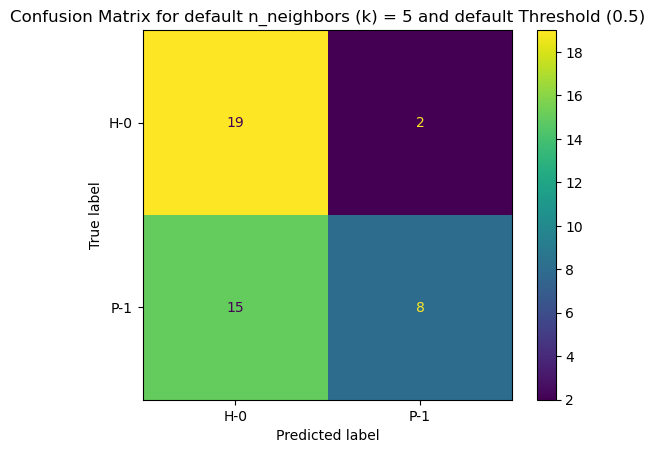

In [28]:
default_confusion_mat = confusion_matrix(y_test, default_test_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=default_confusion_mat, display_labels=['H-0', 'P-1' ])
disp.plot()
plt.title('Confusion Matrix for default n_neighbors (k) = 5 and default Threshold (0.5)')
plt.show()

In [29]:
def get_misclassification_rate_for_k(k, X, y):
    knn_pipe = Pipeline([('scaler', StandardScaler()),('knn', KNeighborsClassifier(n_neighbors = k))])
    knn_pipe.fit(X, y)
    return 1 - accuracy_score(knn_pipe.predict(X), y)

In [30]:
ks = range(1, len(X_train))
errors = [get_misclassification_rate_for_k(k, X_train, y_train['class']) for k in ks]
errors_and_ks = pd.DataFrame({'k': ks, 'Misclassification Rate': errors})

In [31]:
errors_and_ks

k  Misclassification Rate
0      1                0.000000
1      2                0.261538
2      3                0.200000
3      4                0.284615
4      5                0.223077
..   ...                     ...
124  125                0.253846
125  126                0.246154
126  127                0.246154
127  128                0.292308
128  129                0.492308

[129 rows x 2 columns]

In [32]:
errors_and_ks["-k"] = -errors_and_ks["k"]

In [33]:
errors_and_ks

k  Misclassification Rate   -k
0      1                0.000000   -1
1      2                0.261538   -2
2      3                0.200000   -3
3      4                0.284615   -4
4      5                0.223077   -5
..   ...                     ...  ...
124  125                0.253846 -125
125  126                0.246154 -126
126  127                0.246154 -127
127  128                0.292308 -128
128  129                0.492308 -129

[129 rows x 3 columns]

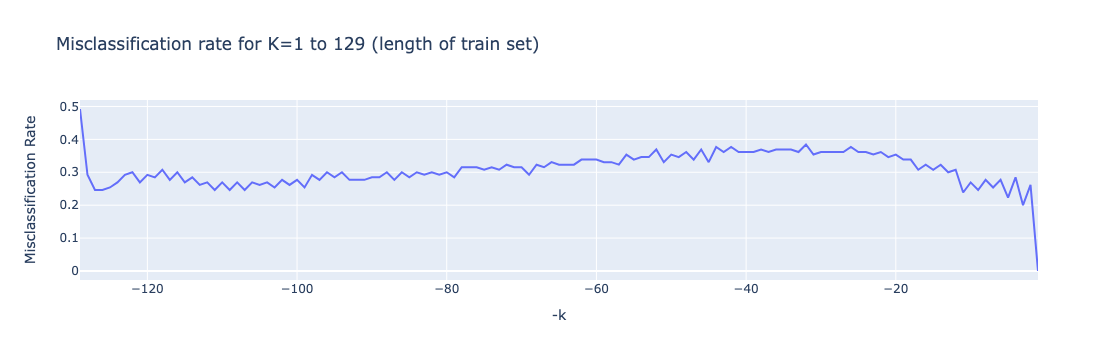

In [34]:
px.line(errors_and_ks, x = "-k", y = "Misclassification Rate", title="Misclassification rate for K=1 to 129 (length of train set)")

#### Image of Plotly line chart for Github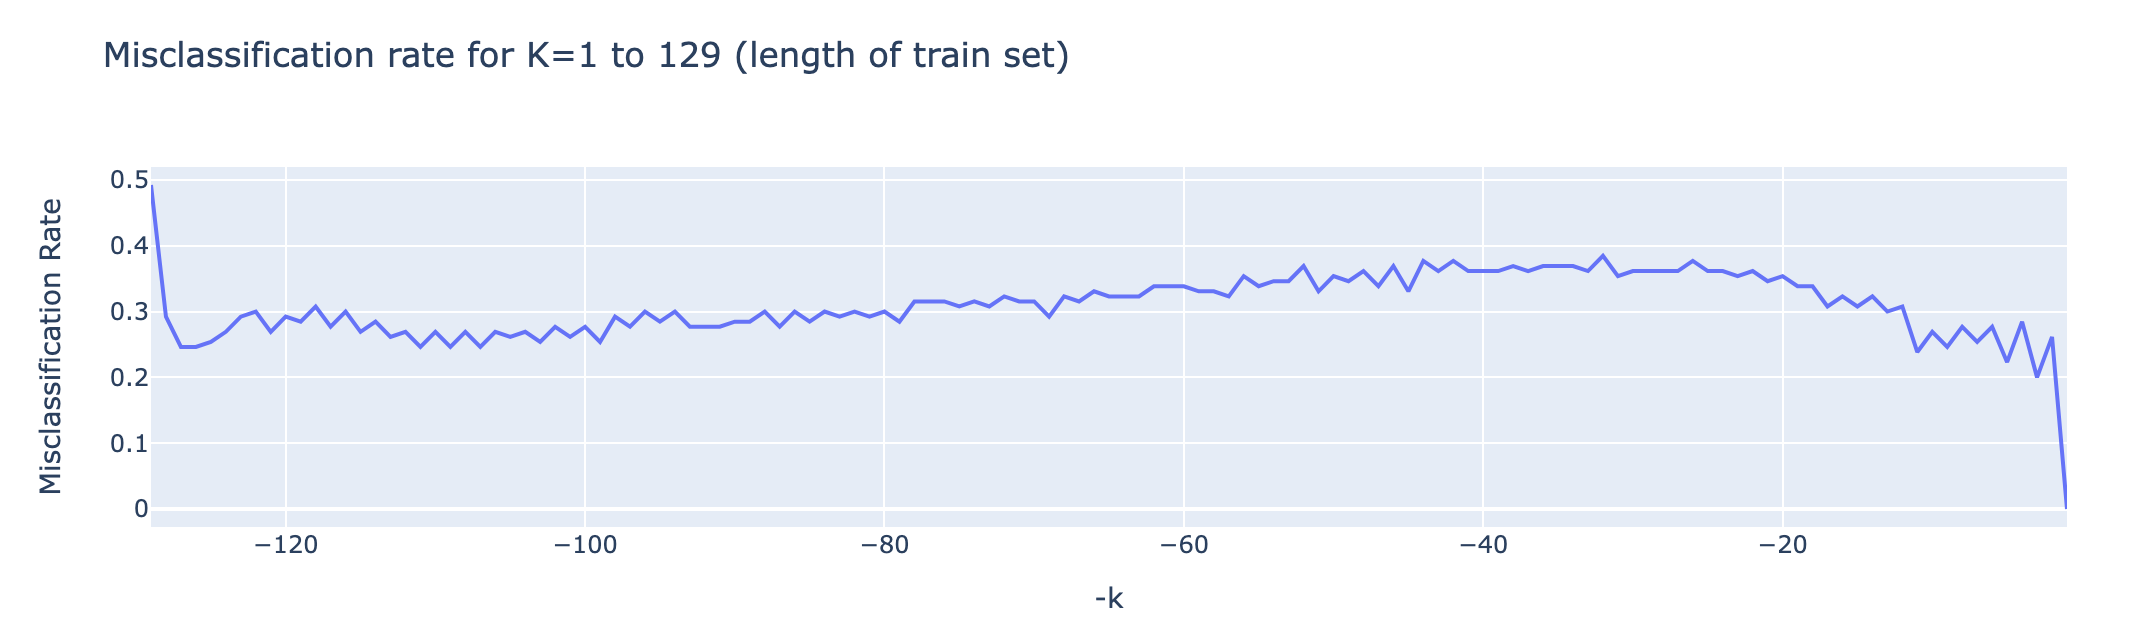

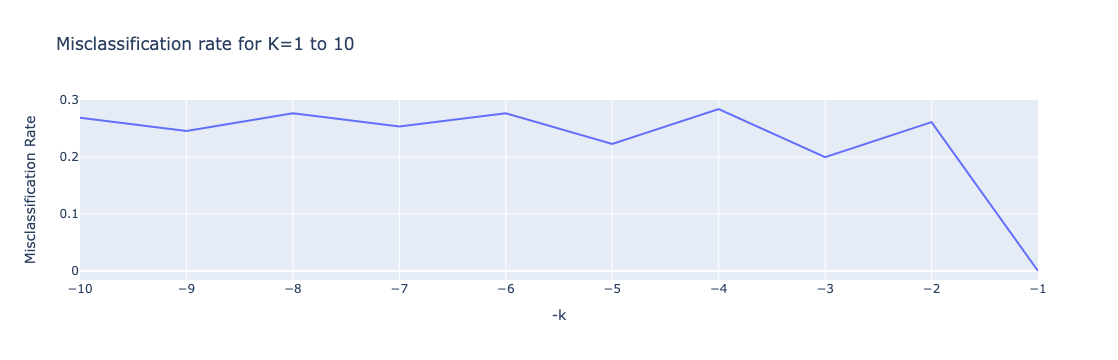

In [36]:
px.line(errors_and_ks.head(10), x = "-k", y = "Misclassification Rate", title="Misclassification rate for K=1 to 10")

#### Image of Plotly line chart for Github
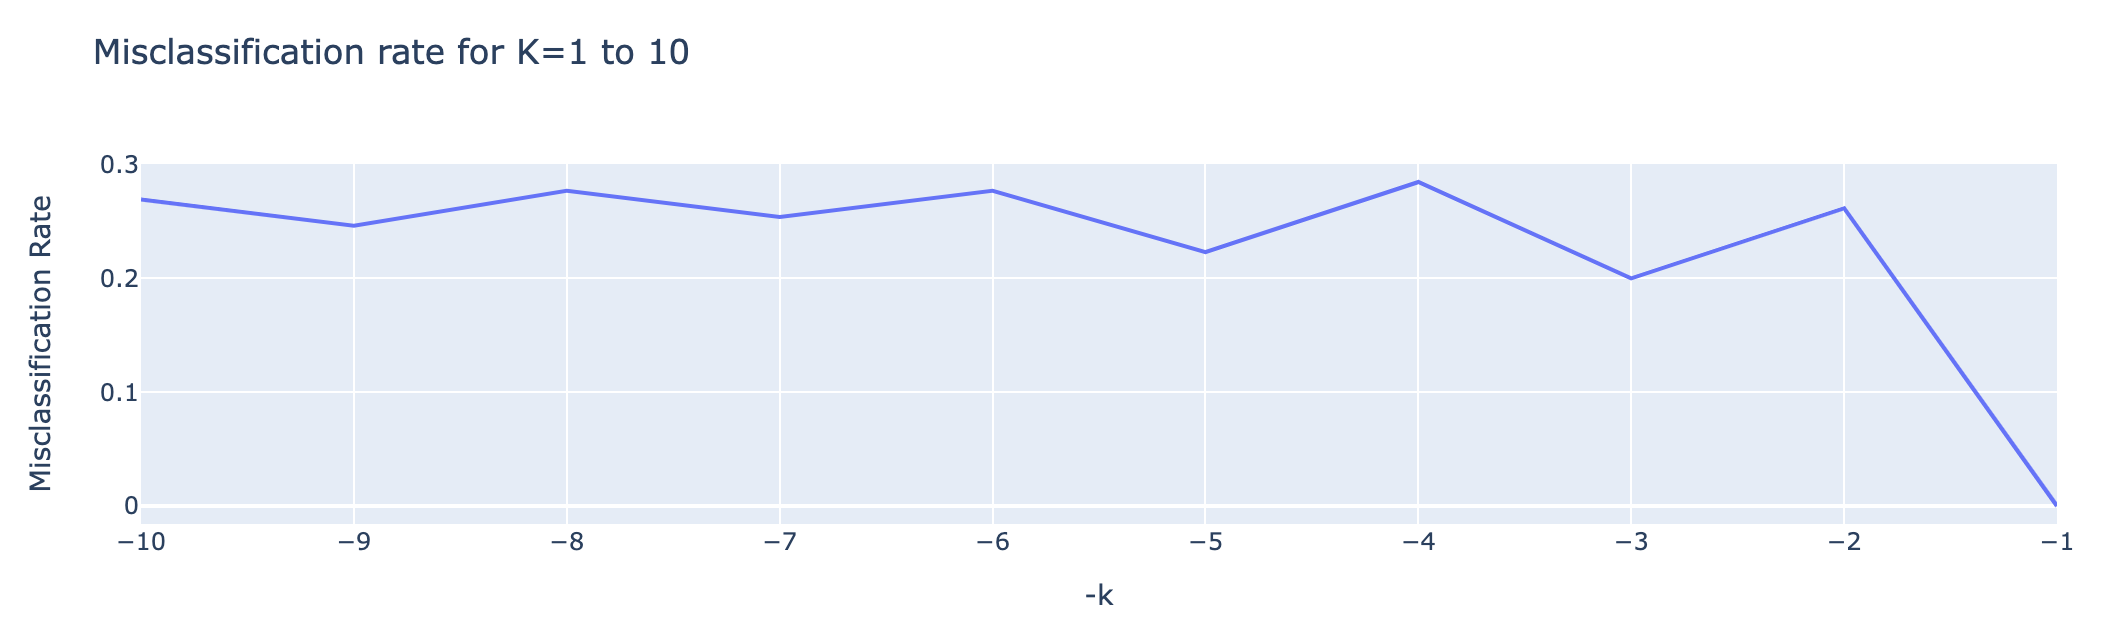

In [38]:
# Grid Search CV for K = 1 to 129 and scoring = accuracy
grid_pipe = KNeighborsClassifier()
parameters_to_try = {'n_neighbors': np.array(range(1, len(X_train)))}

model_finder = GridSearchCV(estimator = grid_pipe, 
                               param_grid = parameters_to_try, 
                               scoring = "accuracy",
                               cv = 5)

In [39]:
model_finder.fit(X_train, y_train['class'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129])},
             scoring='accuracy')

In [40]:
# Best K = 3 using Grid Search CV
model_finder.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [41]:
model_finder.cv_results_['mean_test_score']

array([0.7       , 0.7       , 0.76923077, 0.66923077, 0.73076923,
       0.66923077, 0.7       , 0.67692308, 0.68461538, 0.66923077,
       0.63846154, 0.63846154, 0.62307692, 0.59230769, 0.60769231,
       0.61538462, 0.63076923, 0.6       , 0.60769231, 0.6       ,
       0.57692308, 0.58461538, 0.57692308, 0.58461538, 0.60769231,
       0.56153846, 0.6       , 0.55384615, 0.58461538, 0.53076923,
       0.58461538, 0.53846154, 0.54615385, 0.53846154, 0.55384615,
       0.53076923, 0.55384615, 0.53076923, 0.53846154, 0.53076923,
       0.55384615, 0.52307692, 0.56153846, 0.53846154, 0.59230769,
       0.54615385, 0.59230769, 0.57692308, 0.58461538, 0.57692308,
       0.6       , 0.58461538, 0.59230769, 0.56923077, 0.6       ,
       0.59230769, 0.6       , 0.57692308, 0.6       , 0.56153846,
       0.57692308, 0.53076923, 0.58461538, 0.59230769, 0.58461538,
       0.55384615, 0.58461538, 0.57692308, 0.59230769, 0.56153846,
       0.58461538, 0.57692308, 0.6       , 0.61538462, 0.59230

In [42]:
len(X_train)

130

In [43]:
gridsearch_output = pd.DataFrame({'CV accuracy': model_finder.cv_results_['mean_test_score'],
             'k': np.array(range(1, len(X_train)))})

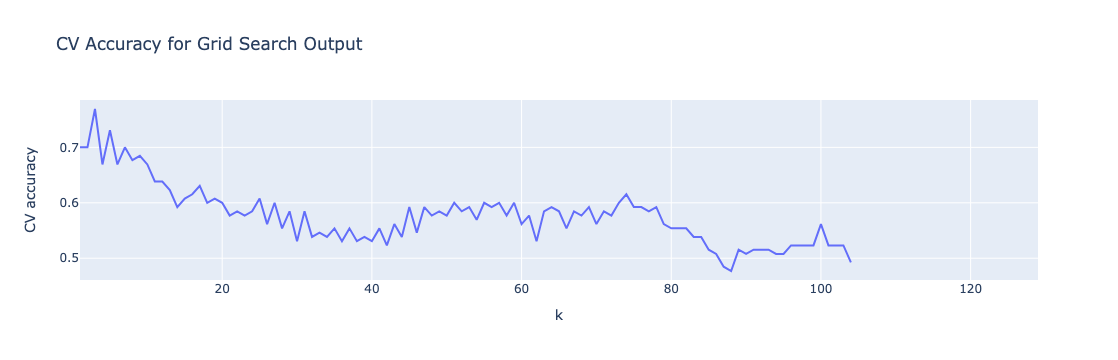

In [44]:
px.line(gridsearch_output, x = "k", y = "CV accuracy", title="CV Accuracy for Grid Search Output")

#### Image of Plotly line chart for Github
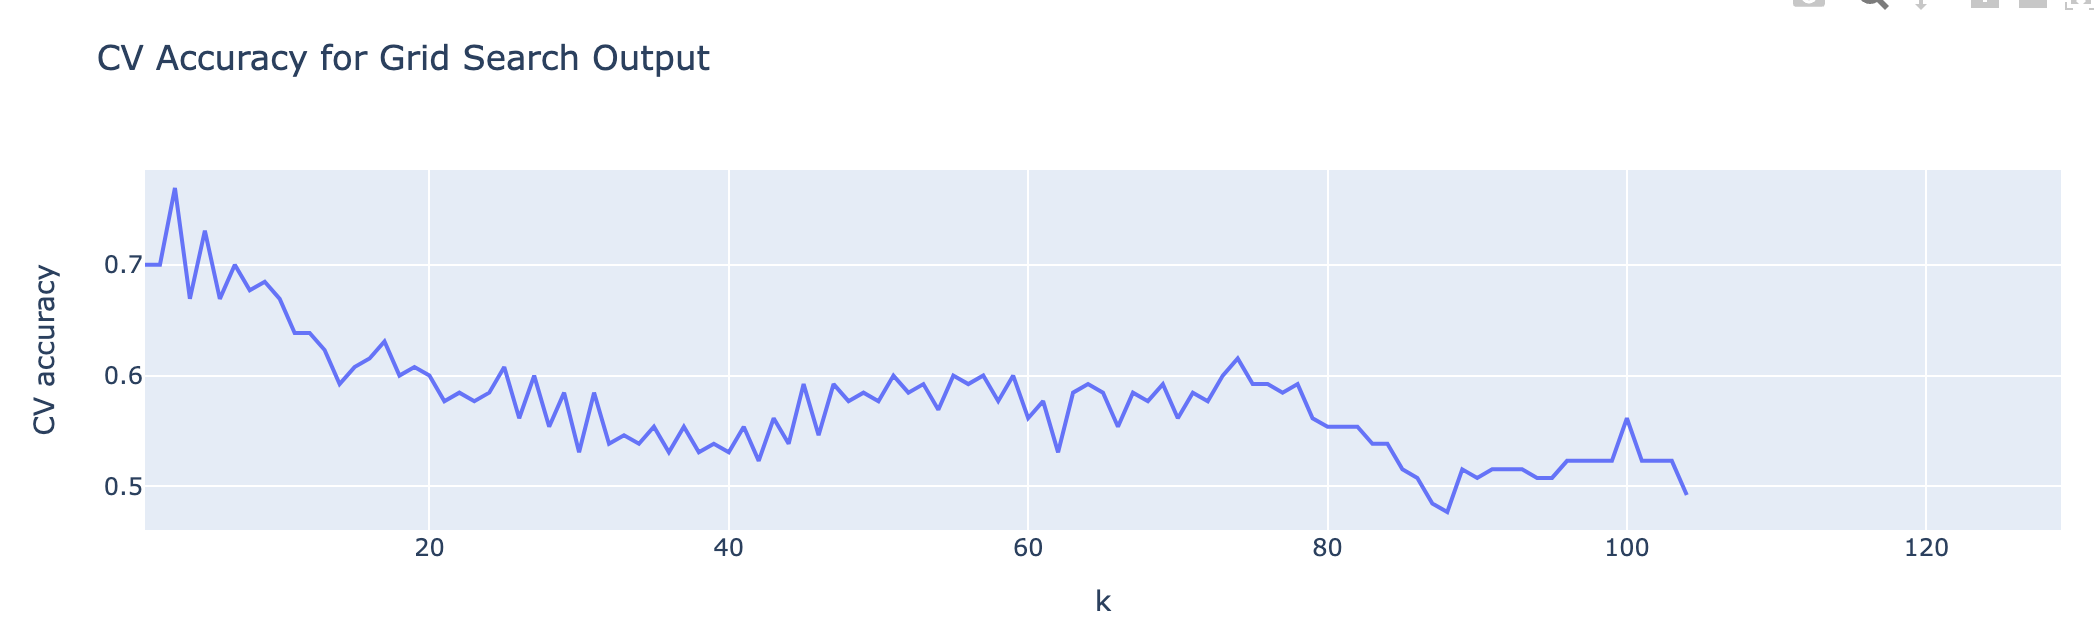

In [46]:
gridsearch_output["-k"] = -gridsearch_output["k"]
gridsearch_output["CV Error"] = 1 - gridsearch_output["CV accuracy"]

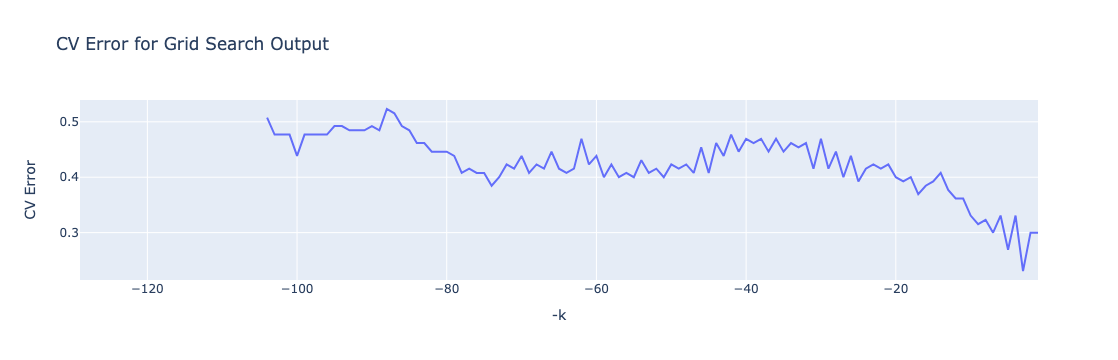

In [47]:
px.line(gridsearch_output, x = "-k", y = "CV Error", title="CV Error for Grid Search Output")

#### Image of Plotly line chart for Github
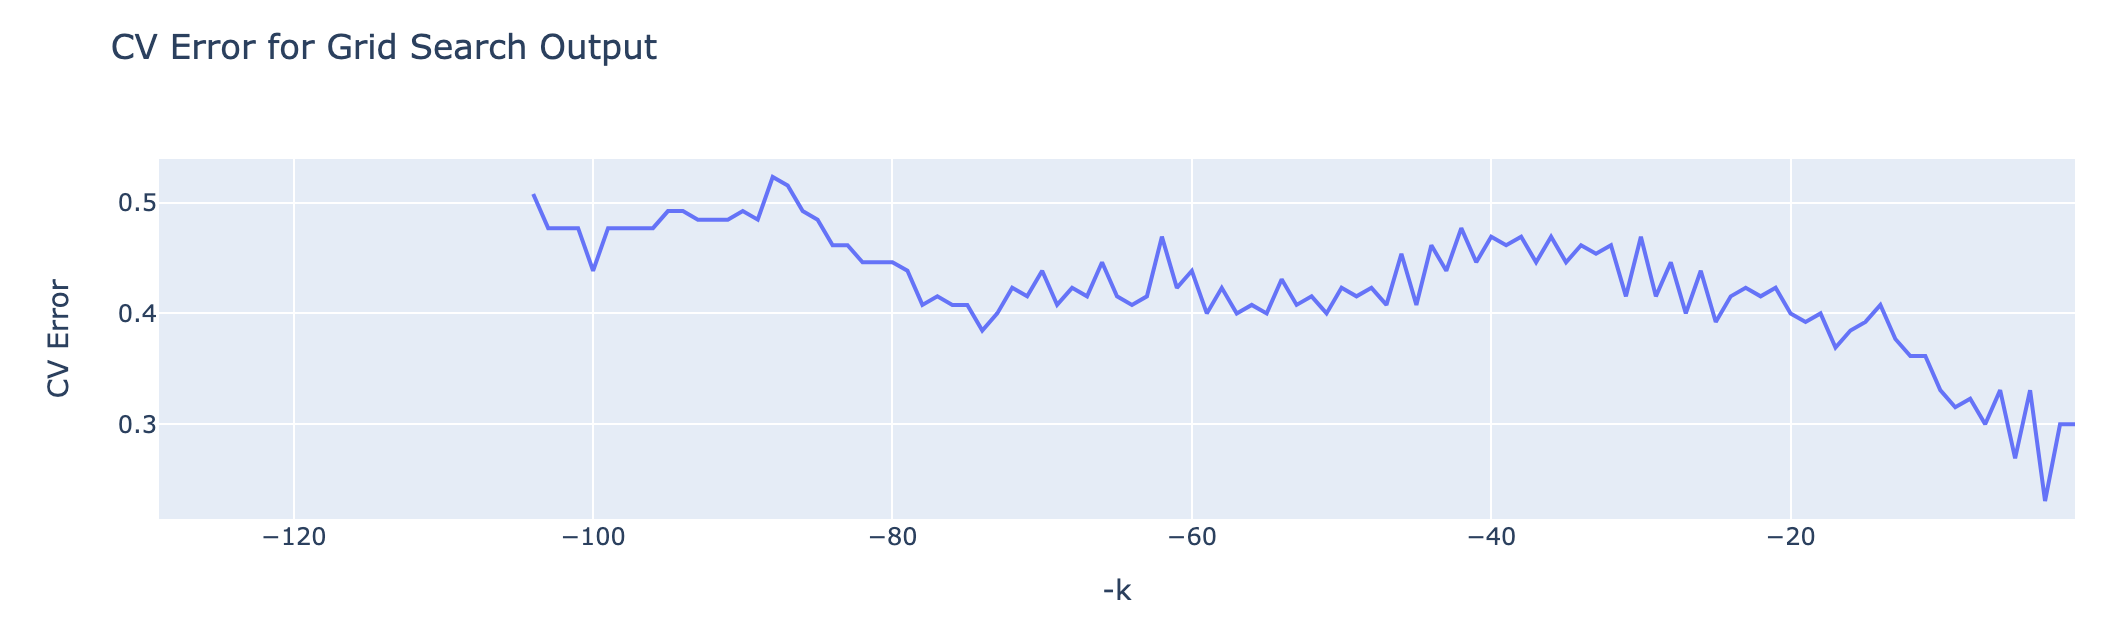

In [49]:
gridsearch_output

CV accuracy    k   -k  CV Error
0       0.700000    1   -1  0.300000
1       0.700000    2   -2  0.300000
2       0.769231    3   -3  0.230769
3       0.669231    4   -4  0.330769
4       0.730769    5   -5  0.269231
..           ...  ...  ...       ...
124          NaN  125 -125       NaN
125          NaN  126 -126       NaN
126          NaN  127 -127       NaN
127          NaN  128 -128       NaN
128          NaN  129 -129       NaN

[129 rows x 4 columns]

In [50]:
both_training_and_CV_errors = pd.merge(errors_and_ks.rename(columns = {"Misclassification Rate": "Training Error"}),
         gridsearch_output,
         left_on = "-k",
         right_on = "-k",
         how = "inner")
both_training_and_CV_errors

k_x  Training Error   -k  CV accuracy  k_y  CV Error
0      1        0.000000   -1     0.700000    1  0.300000
1      2        0.261538   -2     0.700000    2  0.300000
2      3        0.200000   -3     0.769231    3  0.230769
3      4        0.284615   -4     0.669231    4  0.330769
4      5        0.223077   -5     0.730769    5  0.269231
..   ...             ...  ...          ...  ...       ...
124  125        0.253846 -125          NaN  125       NaN
125  126        0.246154 -126          NaN  126       NaN
126  127        0.246154 -127          NaN  127       NaN
127  128        0.292308 -128          NaN  128       NaN
128  129        0.492308 -129          NaN  129       NaN

[129 rows x 6 columns]

In [51]:
both_training_and_CV_errors["CV Error"]

0      0.300000
1      0.300000
2      0.230769
3      0.330769
4      0.269231
         ...   
124         NaN
125         NaN
126         NaN
127         NaN
128         NaN
Name: CV Error, Length: 129, dtype: float64

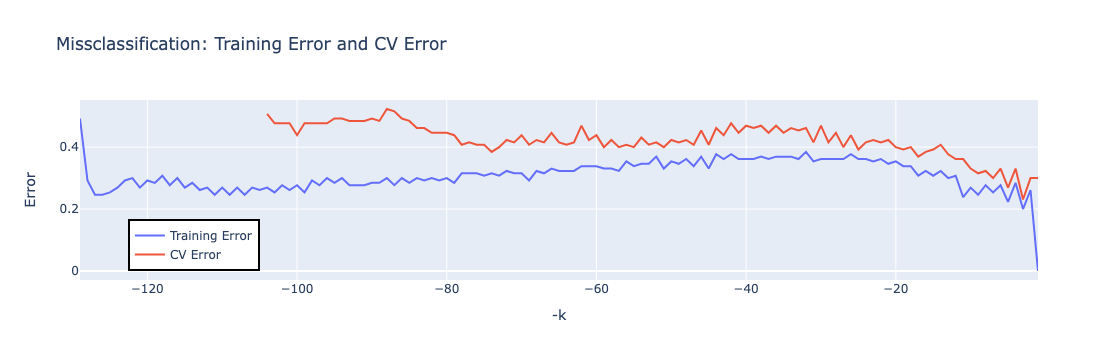

In [52]:
# Create a line plot with custom labels
fig = px.line(
    both_training_and_CV_errors, 
    x='-k', 
    y=['Training Error', 'CV Error'], 
    title='Missclassification: Training Error and CV Error'
)

fig.update_layout(
    legend_title="",
    xaxis_title="-k",
    yaxis_title="Error",
    legend=dict(
        x=0.05,
        y=0.05,
        bordercolor="Black",
        borderwidth=2
    )
)

# Show the plot
fig.show()

#### Image of Plotly line chart for Github
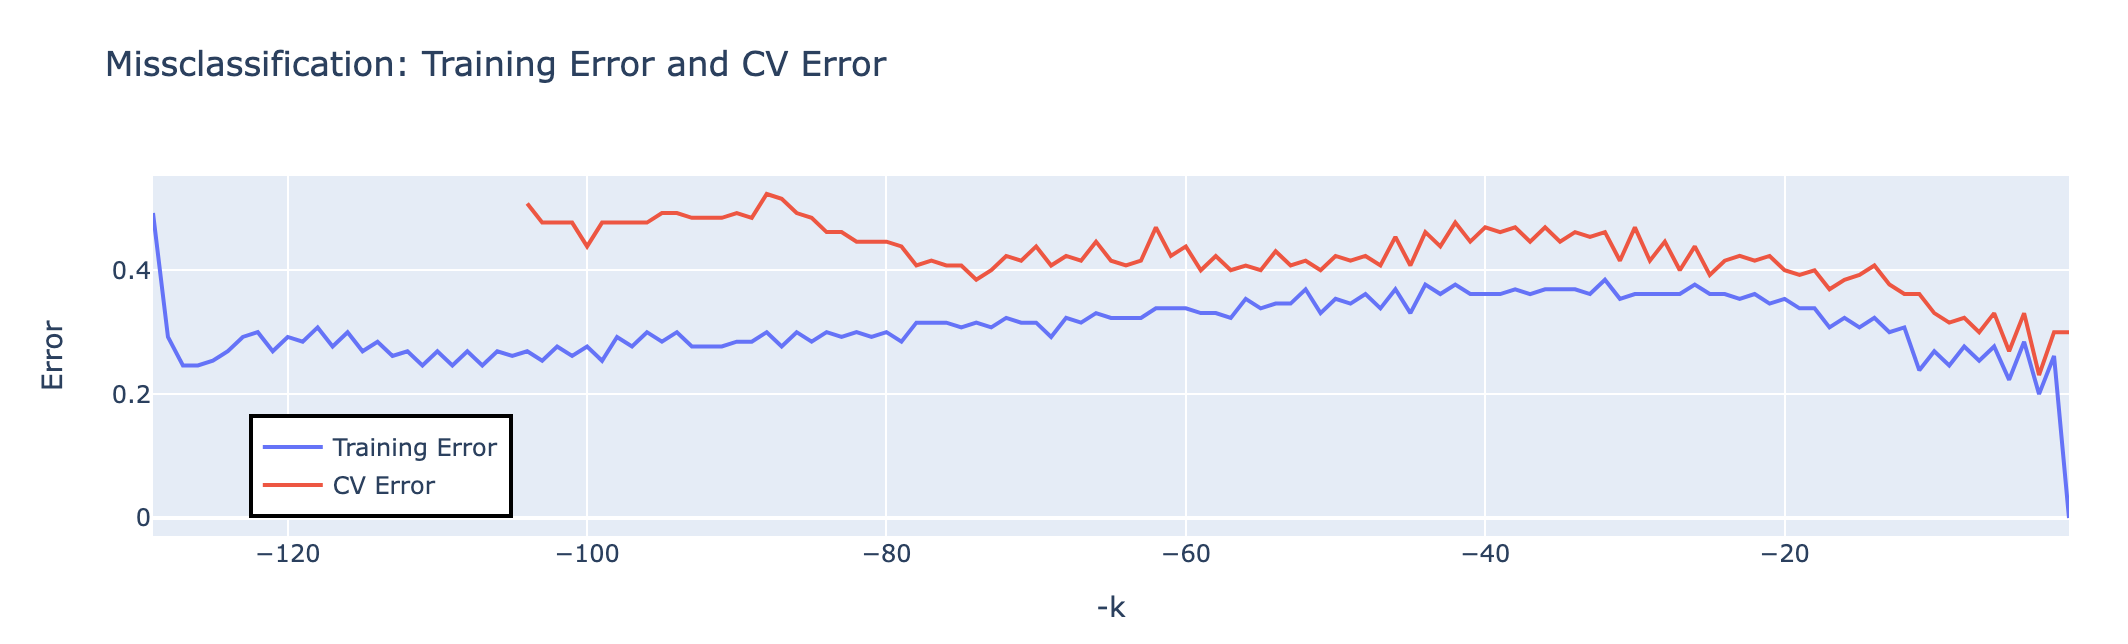

In [54]:
# K = 3 is best Hyperparameter

In [55]:
# KNN Classifier model and predictions for k=3
best_k3_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors = 3))    
])

In [56]:
best_k3_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [57]:
best_k3_preds = best_k3_pipe.predict(X_test)

In [58]:
best_k3_preds

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [59]:
best_k3_accuracy = round(accuracy_score(y_test, best_k3_preds),2)
best_k3_precision = round(precision_score(y_test, best_k3_preds),2)
best_k3_recall = round(recall_score(y_test, best_k3_preds),2)
best_k3_f1 = round(f1_score(y_test, best_k3_preds),2)

print(f'best_k3_accuracy: {best_k3_accuracy}, \
best_k3_precision: {best_k3_precision}, \
best_k3_recall: {best_k3_recall}, \
best_k3_f1: {best_k3_f1}')

best_k3_accuracy: 0.61, best_k3_precision: 0.88, best_k3_recall: 0.3, best_k3_f1: 0.45


In [60]:
# Best K=3 Classification Report
print(classification_report(y_test, best_k3_preds)) 

              precision    recall  f1-score   support

           0       0.56      0.95      0.70        21
           1       0.88      0.30      0.45        23

    accuracy                           0.61        44
   macro avg       0.72      0.63      0.58        44
weighted avg       0.72      0.61      0.57        44



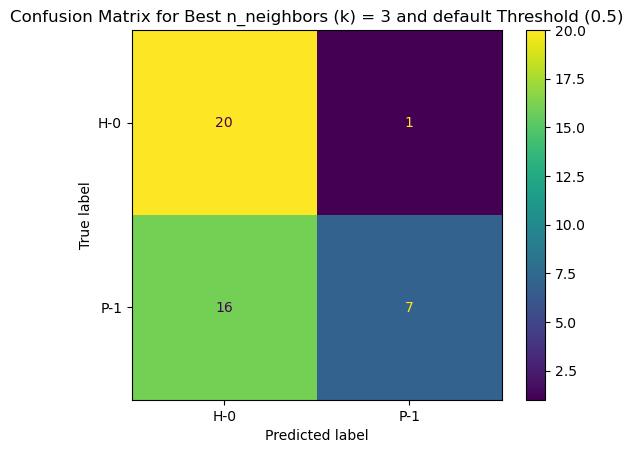

In [61]:
best_k3_confusion_mat = confusion_matrix(y_test, best_k3_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=best_k3_confusion_mat, display_labels=['H-0', 'P-1' ])
disp.plot()
plt.title('Confusion Matrix for Best n_neighbors (k) = 3 and default Threshold (0.5)')
plt.show()

In [62]:
# improve recall for identifying more 'P' cases and minimising FN

### predict_proba using best k=3

In [64]:
best_k3_probs = best_k3_pipe.predict_proba(X_test)
best_k3_probs.shape

(44, 2)

### Precision Recall Curve

In [66]:
precision, recall, thresholds = precision_recall_curve(y_test, best_k3_probs[:, 1])

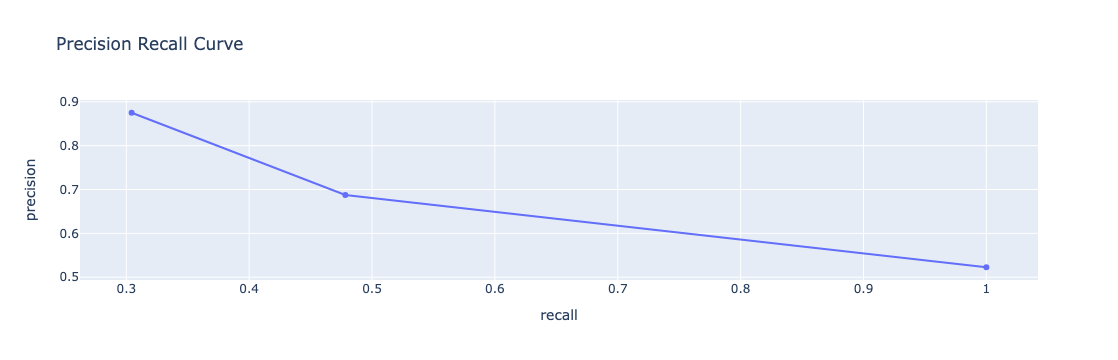

In [67]:
precision_recall_data = pd.DataFrame({"recall": recall[:-1], "precision" : precision[:-1], "T": thresholds})
px.line(precision_recall_data, y = "precision", x = "recall", hover_name = "T", markers = True, title="Precision Recall Curve")

#### Image of Plotly line chart for Github
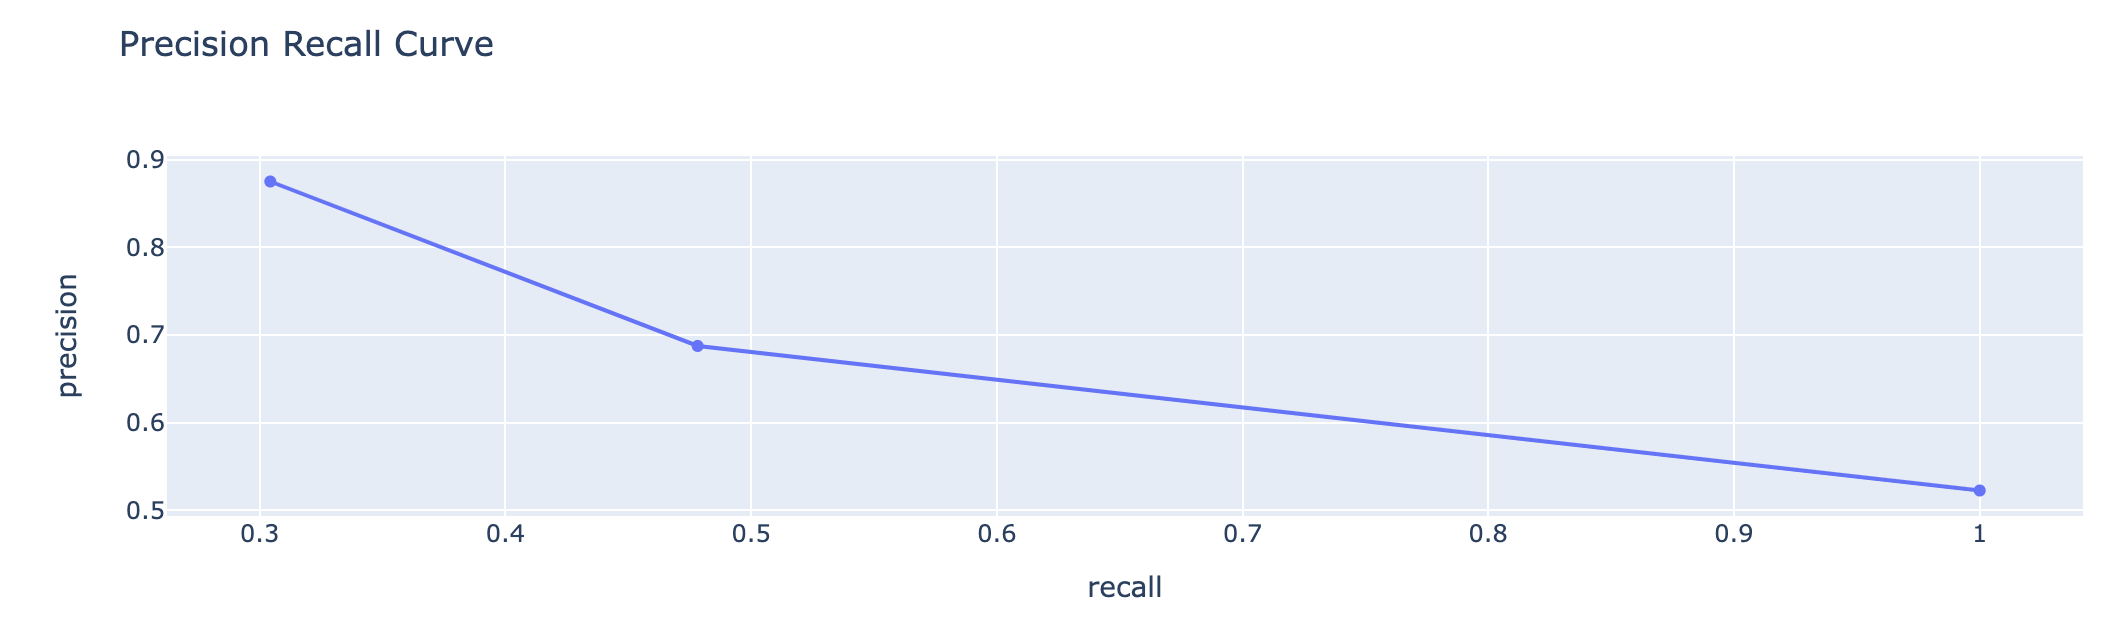

In [69]:
# Best Threshold = 0.33 for best K = 3

In [70]:
thresholds = np.arange(0, 1, .1)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [71]:
def precision_thresh(probs, y_test, thresh):
    preds = np.where(probs >= thresh, 1, 0)
    return precision_score(y_test, preds)

In [72]:
results_df = pd.DataFrame({'threshold': thresholds, 'precision': [precision_thresh(best_k3_probs[:, 1], y_test, i) for i in thresholds]})
results_df

threshold  precision
0        0.0   0.522727
1        0.1   0.687500
2        0.2   0.687500
3        0.3   0.687500
4        0.4   0.875000
5        0.5   0.875000
6        0.6   0.875000
7        0.7   0.875000
8        0.8   0.875000
9        0.9   0.875000

In [73]:
def recall_thresh(probs, y_test, thresh):
    preds = np.where(probs >= thresh, 1, 0)
    return recall_score(y_test, preds)

In [74]:
results_df['recall'] = [recall_thresh(best_k3_probs[:, 1], y_test, i) for i in thresholds]
results_df

threshold  precision    recall
0        0.0   0.522727  1.000000
1        0.1   0.687500  0.478261
2        0.2   0.687500  0.478261
3        0.3   0.687500  0.478261
4        0.4   0.875000  0.304348
5        0.5   0.875000  0.304348
6        0.6   0.875000  0.304348
7        0.7   0.875000  0.304348
8        0.8   0.875000  0.304348
9        0.9   0.875000  0.304348

#### Precision vs. Recall Tradeoff

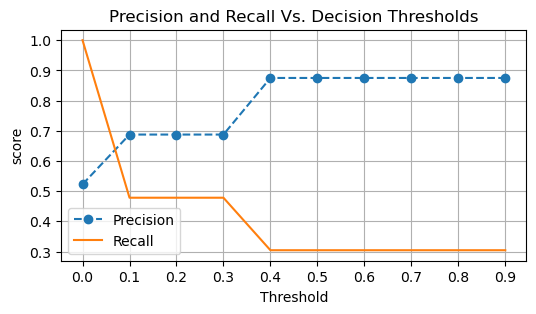

In [76]:
plt.figure(figsize=(6,3))
plt.plot(results_df['threshold'], results_df['precision'], '--o', label = 'precision')
plt.plot(results_df['threshold'], results_df['recall'], label = 'recall')
plt.xticks(thresholds)
plt.xlabel('Threshold')
plt.ylabel('score')
plt.title('Precision and Recall Vs. Decision Thresholds')
plt.legend(['Precision', 'Recall'])
plt.grid();

In [77]:
best_k3_probs

array([[0.66666667, 0.33333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

In [78]:
# Confusion matrix with Threshold = 0.33
best_k3_thresh_preds = np.where(best_k3_probs >= 0.33, 1, 0)
best_k3_thresh_preds[:,1]

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [79]:
best_k3_thresh_accuracy = round(accuracy_score(y_test, best_k3_thresh_preds[:,1]),2)
best_k3_thresh_precision = round(precision_score(y_test, best_k3_thresh_preds[:,1]),2)
best_k3_thresh_recall = round(recall_score(y_test, best_k3_thresh_preds[:,1]),2)
best_k3_thresh_f1 = round(f1_score(y_test, best_k3_thresh_preds[:,1]),2)

print(f'best_k3_thresh_accuracy: {best_k3_thresh_accuracy}, \
best_k3_thresh_precision: {best_k3_thresh_precision}, \
best_k3_thresh_recall: {best_k3_thresh_recall}, \
best_k3_thresh_f1: {best_k3_thresh_f1}')

best_k3_thresh_accuracy: 0.61, best_k3_thresh_precision: 0.69, best_k3_thresh_recall: 0.48, best_k3_thresh_f1: 0.56


In [80]:
print(classification_report(y_test, best_k3_thresh_preds[:,1])) 

              precision    recall  f1-score   support

           0       0.57      0.76      0.65        21
           1       0.69      0.48      0.56        23

    accuracy                           0.61        44
   macro avg       0.63      0.62      0.61        44
weighted avg       0.63      0.61      0.61        44



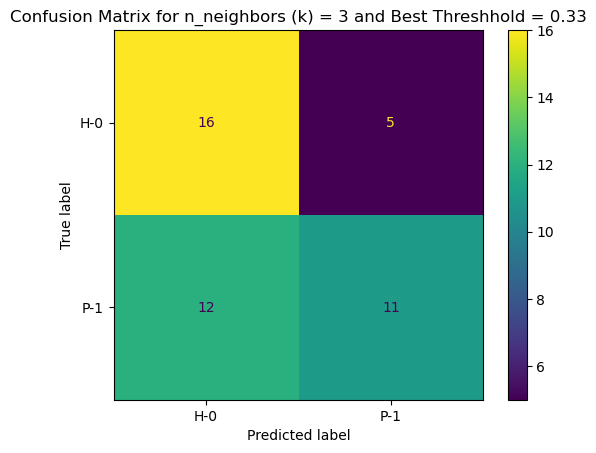

In [81]:
best_k3_thresh_confusion_mat = confusion_matrix(y_test, best_k3_thresh_preds[:,1], labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=best_k3_thresh_confusion_mat, display_labels=['H-0', 'P-1' ])
disp.plot()
plt.title('Confusion Matrix for n_neighbors (k) = 3 and Best Threshhold = 0.33')
plt.show()

### ROC Curve

In [83]:
fpr, tpr, thresh_rocs = roc_curve(y_test, best_k3_thresh_preds[:,1])

# Compute ROC area
roc_auc = roc_auc_score(y_test, best_k3_thresh_preds[:,1])

False Positive Rates:  [0.         0.23809524 1.        ]
True Positive Rates:  [0.         0.47826087 1.        ]


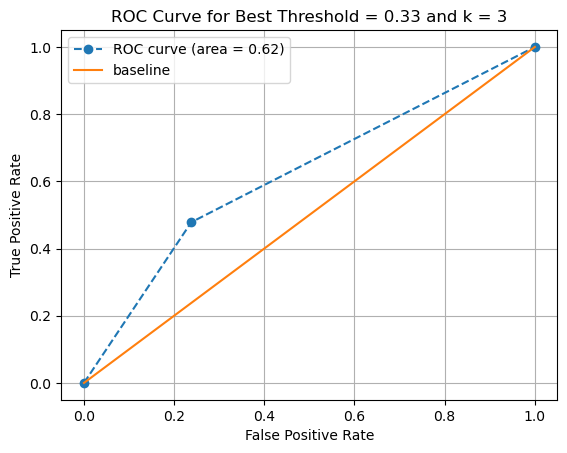

In [84]:
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('ROC Curve for Best Threshold = 0.33 and k = 3')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid();

#### Using Area Under Curve to choose right metric

In [86]:
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())    
])

In [87]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [88]:
roc_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(1, 33, 2)}, scoring = 'roc_auc')
roc_grid.fit(X_train, y_train)
roc_best_k = roc_grid.best_params_['knn__n_neighbors']

In [89]:
roc_best_k

11

In [90]:
roc_preds = roc_grid.predict(X_test)
roc_preds

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [91]:
roc_accuracy = round(accuracy_score(y_test, roc_preds),2)
roc_precision = round(precision_score(y_test, roc_preds),2)
roc_recall = round(recall_score(y_test, roc_preds),2)
roc_f1 = round(f1_score(y_test, roc_preds),2)
print(f'roc_accuracy: {roc_accuracy}, \
roc_precision: {roc_precision}, \
roc_recall: {roc_recall}, \
roc_f1: {roc_f1}')

roc_accuracy: 0.64, roc_precision: 1.0, roc_recall: 0.3, roc_f1: 0.47


In [92]:
print(classification_report(y_test, roc_preds))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72        21
           1       1.00      0.30      0.47        23

    accuracy                           0.64        44
   macro avg       0.78      0.65      0.60        44
weighted avg       0.79      0.64      0.59        44



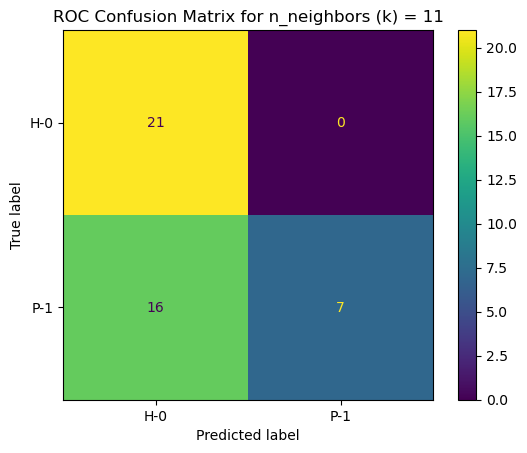

In [93]:
roc_confusion_mat = confusion_matrix(y_test, roc_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=roc_confusion_mat, display_labels=['H-0', 'P-1' ])
disp.plot()
plt.title('ROC Confusion Matrix for n_neighbors (k) = 11')
plt.show()

In [94]:
knn_one = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors = 1))    
])
knn_one.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

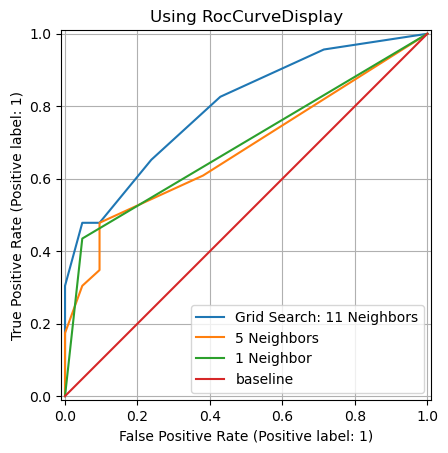

In [95]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(roc_grid, X_test, y_test, ax = ax, label = 'Grid Search: 11 Neighbors')
RocCurveDisplay.from_estimator(knn_pipe, X_test, y_test, ax = ax, label = '5 Neighbors')
RocCurveDisplay.from_estimator(knn_one, X_test, y_test, ax = ax, label = '1 Neighbor')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();

In [96]:
# Compute ROC area for k=11
roc_auc_k11 = roc_auc_score(y_test, roc_preds)
print(f'roc_auc_k11 area: {roc_auc_k11}')

roc_auc_k11 area: 0.6521739130434783


In [97]:
metric = pd.DataFrame({
    'hyperparameters': ['default k=5', 'k=3', 'k=3 T=0.33', 'roc k=11'],
    'accuracy': [default_accuracy, best_k3_accuracy, best_k3_thresh_accuracy, roc_accuracy],
    'precision': [default_precision, best_k3_precision, best_k3_thresh_precision, roc_precision],
    'recall': [default_recall, best_k3_recall, best_k3_thresh_recall, roc_recall],
    'f1': [default_f1, best_k3_f1, best_k3_thresh_f1, roc_f1]
})

In [98]:
metric

hyperparameters  accuracy  precision  recall    f1
0     default k=5      0.61       0.80    0.35  0.48
1             k=3      0.61       0.88    0.30  0.45
2      k=3 T=0.33      0.61       0.69    0.48  0.56
3        roc k=11      0.64       1.00    0.30  0.47

### Conclusion:

- Default n_neighbors (k) = 5
    - default_accuracy: 0.61, default_precision: 0.80, default_recall: 0.35, default_f1: 0.48

#### Using Mis-classification Rate:
- Best k = 3, using mis-classification Rate and 
    - array of k values and calculating accuracy score
    - Grid Search CV with accuracy score
    - best_k3_accuracy: 0.61, best_k3_precision: 0.88, best_k3_recall: 0.30, best_k3_f1: 0.45

#### Using Precision and Recall Vs. Threshold (Precision Recall Curve):

- Best k = 3 and threshold: 0.33 to minimize False Negatives and maximize Recall
    - best_k3_thresh_accuracy: 0.61, best_k3_thresh_precision: 0.69, best_k3_thresh_recall: 0.48, best_k3_thresh_f1: 0.56

#### Using ROC Curve:
- Best K = 11
    - roc_accuracy: 0.64, roc_precision: 1.00, roc_recall: 0.30, roc_f1: 0.47

### Choosing the Right Metric
- Using Grid Search CV with accuracy score to identify best k=3 and using Precision Recall Curve to identify the best threshhold=0.33 gives us the best metric: Recall, Precision and F1.
- For this use case its important to identify as many Alzheimer's patients as possible, minimizing the False negatives. 